In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from deepexplain.tensorflow import DeepExplain

from keras.models import load_model
from keras.models import Model
from keras.preprocessing import image
from keras.applications.xception import Xception, preprocess_input
from keras import backend as K

from visualization_lib import Visualize

Using TensorFlow backend.


In [5]:
def get_image(filepath):
    img = cv2.imread(filepath)[:, :, ::-1]
    img = img / 255.0
    return img

# Code and comments from Chollet's Deep Learning for Python
def grad_cam(label):
    class_output = kmodel.output[:, label]
    last_conv_layer = kmodel.get_layer('block5_conv3')
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    #print('Pooled grads:', pooled_grads.shape[0])
    iterate = K.function([kmodel.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([img1])

    for i in range(pooled_grads.shape[0]): # 512
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    
    # Make heatmap look nice
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    
    return heatmap

# From DeepExplain attribution notebook
def deepexplain(model, img, label, method='intgrad'):
    with DeepExplain(session=K.get_session()) as de:  # <-- init DeepExplain context
        # 1. Get the input tensor to the original model
        input_tensor = model.layers[0].input

        # 2. We now target the output of the last dense layer (pre-softmax)
        # To do so, create a new model sharing the same layers untill the last dense (index -2)
        fModel = Model(inputs=input_tensor, outputs = model.layers[-2].output)
        target_tensor = fModel(input_tensor)

        xs = img.reshape(1, 299, 299, 3)
        ys = np.array([label])

        attributions = de.explain(method, target_tensor * ys, input_tensor, xs)
        
    return attributions

In [6]:
img = get_image('../Data/bird_or_bicycle/0.0.3/test/bird/b44dee4e5513bff7.jpg')

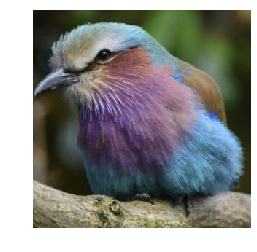

In [7]:
plt.axis('off')
plt.imshow(img)

In [ ]:
img2 = get